In [1]:
import yfinance as yf

# Define the ticker symbol for Apple Inc.
ticker_symbol = 'ABNB'

# Fetch the data
abnb = yf.Ticker(ticker_symbol)

# Get the balance sheet
balance_sheet = abnb.balance_sheet

# Print the balance sheet
print("Balance Sheet for AirBnb:")
print(balance_sheet)

Balance Sheet for AirBnb:
                                                     2024-12-31  \
Treasury Shares Number                                9200000.0   
Ordinary Shares Number                              632200000.0   
Share Issued                                        641400000.0   
Total Debt                                         2294000000.0   
Tangible Book Value                                7635000000.0   
...                                                         ...   
Allowance For Doubtful Accounts Receivable          -28000000.0   
Gross Accounts Receivable                           175000000.0   
Cash Cash Equivalents And Short Term Investments  10611000000.0   
Other Short Term Investments                       3747000000.0   
Cash And Cash Equivalents                          6864000000.0   

                                                     2023-12-31    2022-12-31  \
Treasury Shares Number                                9200000.0     9000000.0   
Ordinar

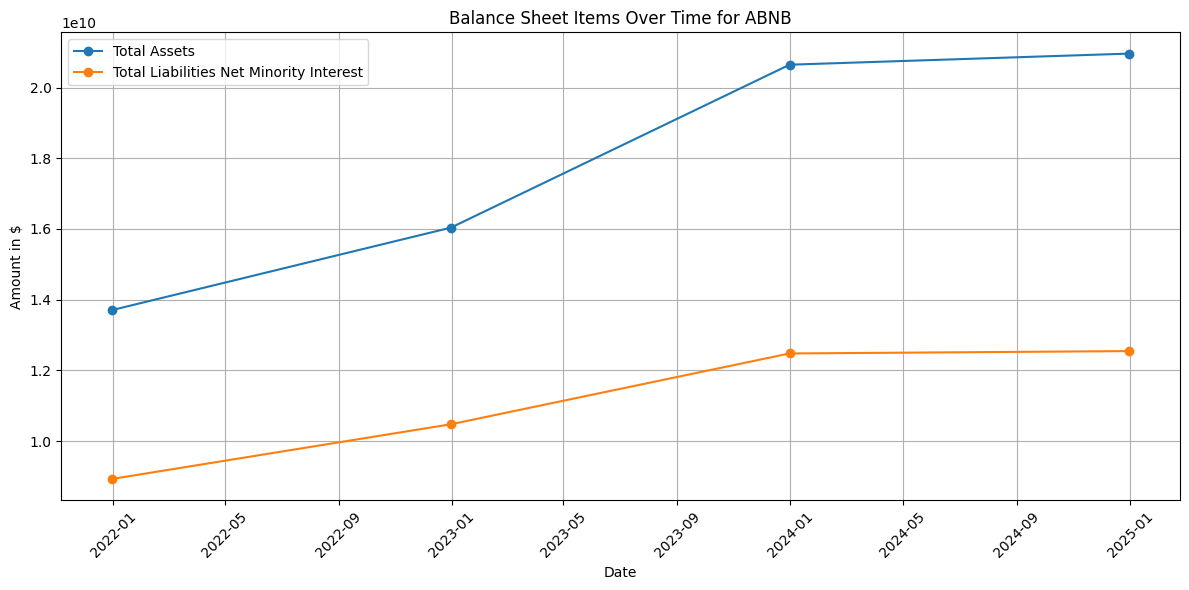

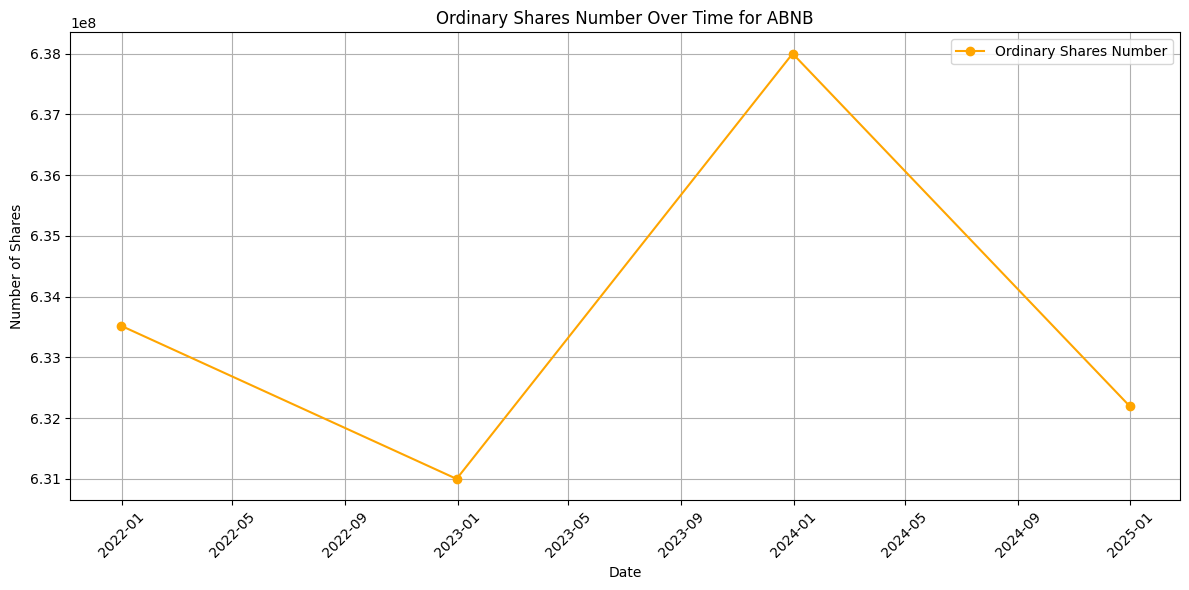

In [2]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd  # Import pandas

# Define the ticker symbol for Apple Inc.
ticker_symbol = 'ABNB'

# Fetch the data
abnb = yf.Ticker(ticker_symbol)

# Get the balance sheet
balance_sheet = abnb.balance_sheet

# Transpose the DataFrame to make it easier to work with
balance_sheet = balance_sheet.transpose()

# Select important items
important_items = ['Total Assets', 'Total Liabilities Net Minority Interest']
selected_data = balance_sheet[important_items]

# Convert the index to datetime
selected_data.index = pd.to_datetime(selected_data.index)

# Plotting Total Assets and Total Liabilities
plt.figure(figsize=(12, 6))
for item in important_items:
    plt.plot(selected_data.index, selected_data[item], marker='o', label=item)

plt.title(f'Balance Sheet Items Over Time for {ticker_symbol}')
plt.xlabel('Date')
plt.ylabel('Amount in $')
plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plotting Ordinary Shares Number in a separate chart
ordinary_shares = balance_sheet['Ordinary Shares Number'].transpose()
ordinary_shares.index = pd.to_datetime(ordinary_shares.index)

plt.figure(figsize=(12, 6))
plt.plot(ordinary_shares.index, ordinary_shares, marker='o', color='orange', label='Ordinary Shares Number')

plt.title(f'Ordinary Shares Number Over Time for {ticker_symbol}')
plt.xlabel('Date')
plt.ylabel('Number of Shares')
plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\narji\AppData\Local\Temp\ipykernel_1440\3433684455.py:38: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  future_dates = pd.date_range(start=series.index[-1] + pd.DateOffset(years=1), periods=3, freq='Y')


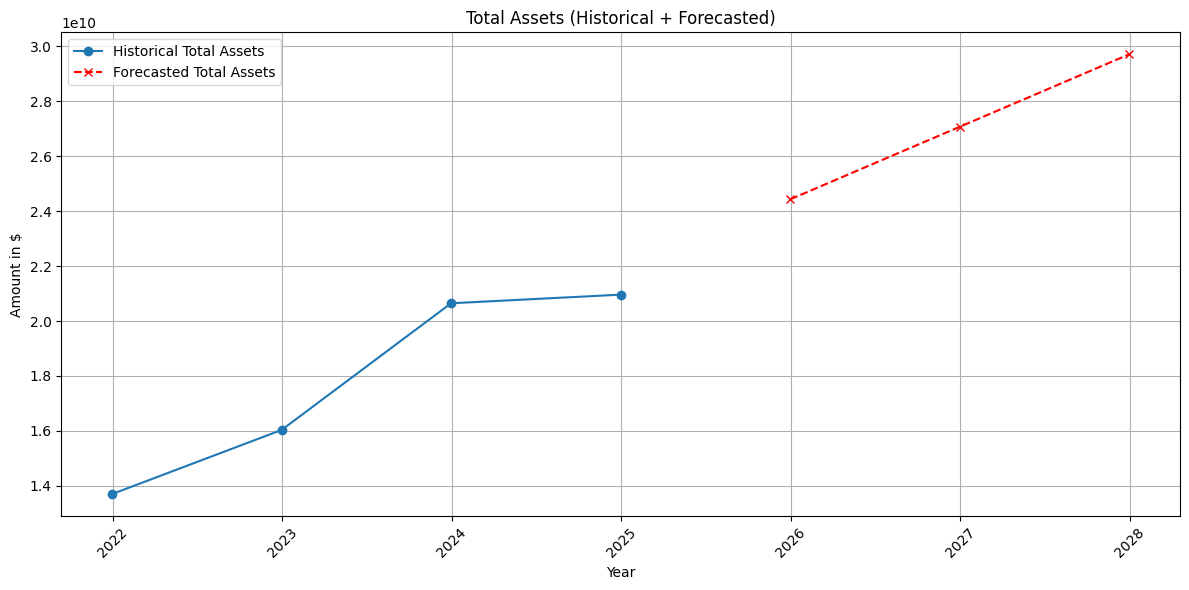

C:\Users\narji\AppData\Local\Temp\ipykernel_1440\3433684455.py:38: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  future_dates = pd.date_range(start=series.index[-1] + pd.DateOffset(years=1), periods=3, freq='Y')


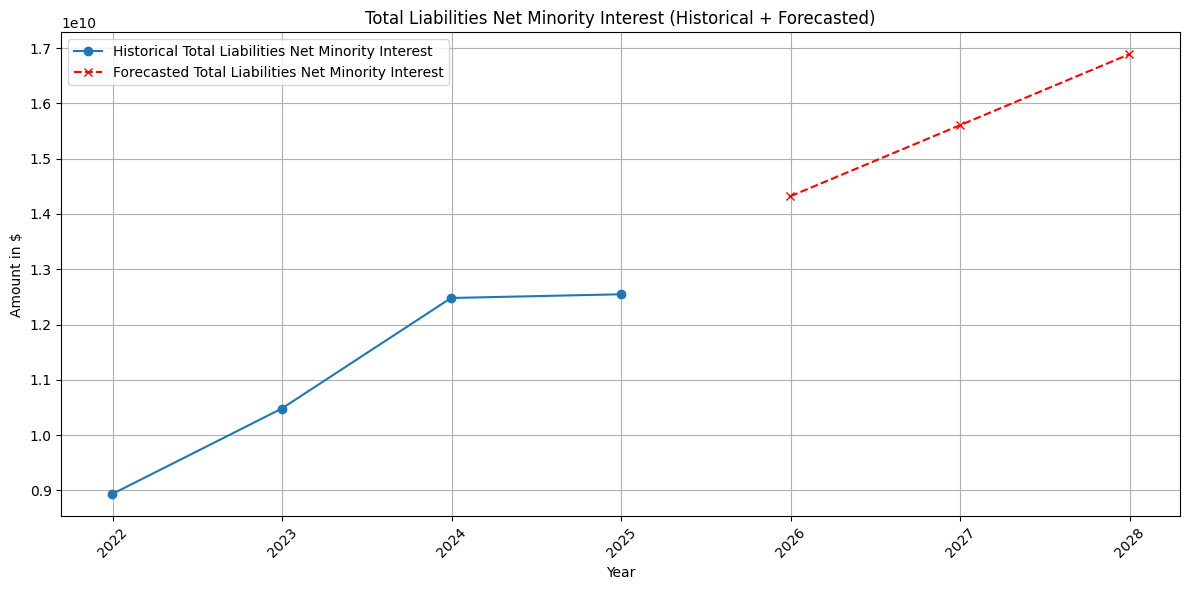

C:\Users\narji\AppData\Local\Temp\ipykernel_1440\3433684455.py:38: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  future_dates = pd.date_range(start=series.index[-1] + pd.DateOffset(years=1), periods=3, freq='Y')


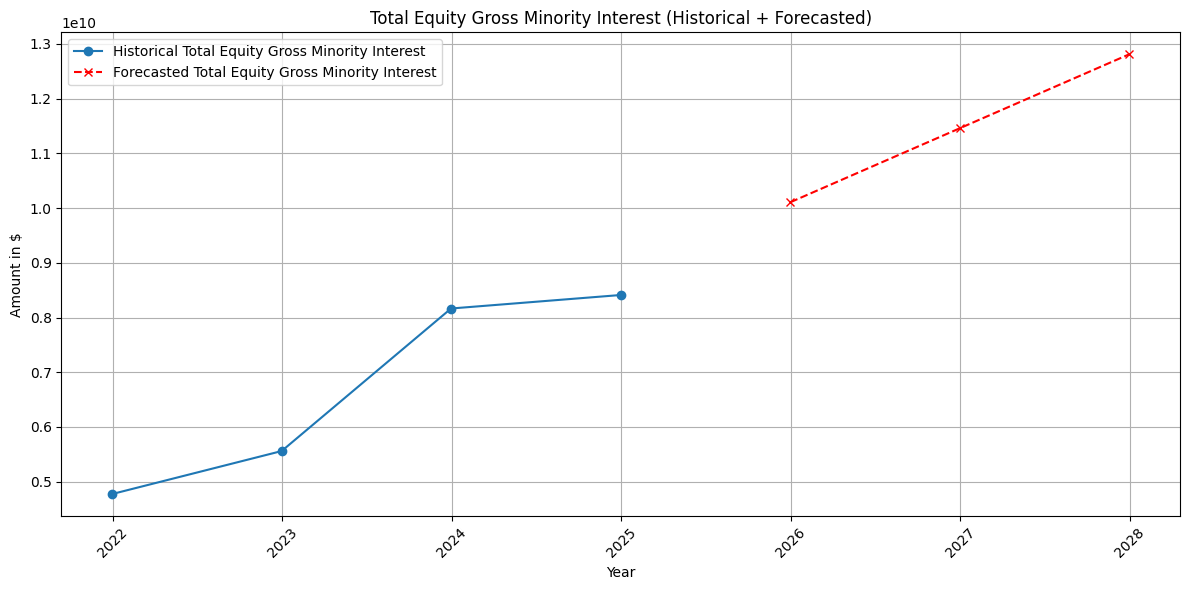

In [3]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

# Define the ticker symbol
ticker_symbol = 'ABNB'

# Fetch the data
abnb = yf.Ticker(ticker_symbol)

# Get and prepare the balance sheet
balance_sheet = abnb.balance_sheet.transpose()
balance_sheet.index = pd.to_datetime(balance_sheet.index)

# Select key items to forecast
key_items = [
    'Total Assets',
    'Total Liabilities Net Minority Interest',
    'Total Equity Gross Minority Interest'
]

# Drop NaNs
selected_data = balance_sheet[key_items].dropna()

# Function to forecast and plot each item
def forecast_and_plot(series, item_name):
    series = series.sort_index()
    X = np.arange(len(series)).reshape(-1, 1)
    y = series.values
    model = LinearRegression()
    model.fit(X, y)

    # Predict next 3 years
    future_X = np.arange(len(series), len(series) + 3).reshape(-1, 1)
    future_y = model.predict(future_X)
    future_dates = pd.date_range(start=series.index[-1] + pd.DateOffset(years=1), periods=3, freq='Y')
    future_series = pd.Series(future_y, index=future_dates)

    # Plotting
    plt.figure(figsize=(12, 6))
    plt.plot(series.index, series.values, marker='o', label=f'Historical {item_name}')
    plt.plot(future_series.index, future_series.values, marker='x', linestyle='--', color='red', label=f'Forecasted {item_name}')
    plt.title(f'{item_name} (Historical + Forecasted)')
    plt.xlabel('Year')
    plt.ylabel('Amount in $')
    plt.legend()
    plt.grid()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    return future_series

# Forecast and plot each item
for item in key_items:
    forecast_and_plot(selected_data[item], item)
